In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import scipy as sp

import h5py

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

%matplotlib inline

In [2]:
f = h5py.File('C:/Users/kevin/Downloads/worm_tseries.h5','r')

In [3]:
fields = np.sort(np.array(list(f.keys())))
print(fields)

['0' '1' '10' '11' '2' '3' '4' '5' '6' '7' '8' '9']


In [4]:
(f['0']['tseries']).shape

(200, 4)

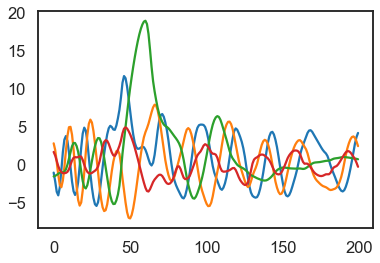

In [5]:
test = f['7']['tseries']
plt.plot(test)

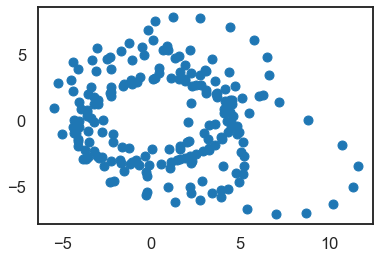

In [6]:
plt.plot(test[:,0],test[:,1],'o')

In [14]:
tseries.shape

(12, 200, 4)

In [17]:
temp1 = []
for ii in range(len(fields)):
    temp2 = f[fields[ii]]['tseries']
    temp1.append(np.array(temp2))
temp3 = np.array(temp1)
tseries = temp3.reshape(-1, temp3.shape[2])

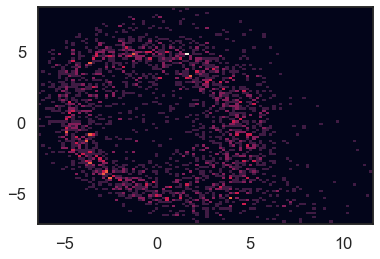

In [18]:
H = plt.hist2d(tseries[:,0],tseries[:,1],100)

In [19]:
def ANG(vector_1,vector_2):
    unit_vector_1 = vector_1 / np. linalg. norm(vector_1)
    unit_vector_2 = vector_2 / np. linalg. norm(vector_2)
    dot_product = np. dot(unit_vector_1, unit_vector_2)
    angle = np. arccos(dot_product)
    return angle

In [20]:
def ANG2(a1,a2):
    norm = a1**2 + a2**2
    a1,a2 = a1/norm, a2/norm
    ang = np.arctan(a2/a1)
    return ang

In [21]:
phi_t = np.zeros(tseries.shape[0])
e1 = np.array([1,0])
for tt in range(tseries.shape[0]):
    #phi_t[tt] = ANG(e1,tseries[tt,:2]) - np.pi/2
    phi_t[tt] = ANG2(tseries[tt,0],tseries[tt,1])

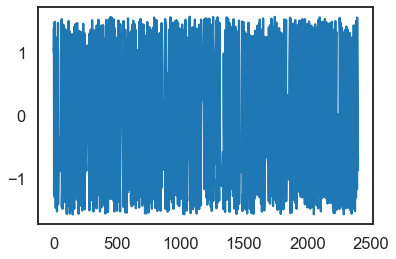

In [22]:
plt.plot(phi_t)

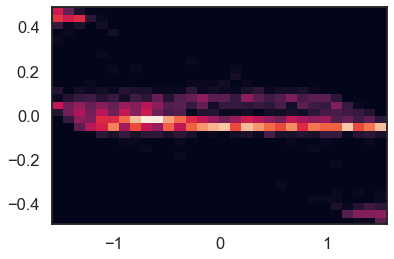

In [23]:
Phi = phi_t[:-1]
omg = np.diff(phi_t)/np.pi/2
H2 = plt.hist2d(Phi,omg,30)

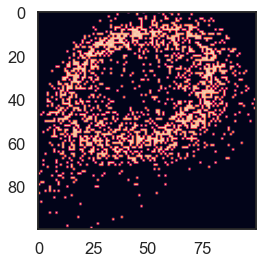

In [24]:
plt.imshow(np.log(H[0]+0.000001))

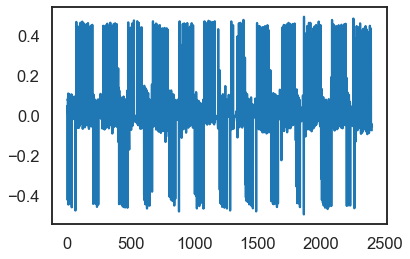

In [25]:
plt.plot(omg)

In [26]:
D = 50
T = Phi.shape[0]
sinPhi = np.sin(Phi)
X1 = sp.linalg.hankel(np.append(np.zeros(D-2),sinPhi[:T-D+2]),sinPhi[T-D+1:])
a3t = tseries[:-1,2]
X2 = sp.linalg.hankel(np.append(np.zeros(D-2),a3t[:T-D+2]),a3t[T-D+1:])

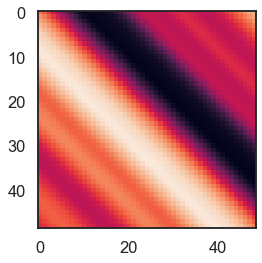

In [28]:
plt.imshow(X1.T @ X2)

In [29]:
### fit forcing phase plane
### tilting the forcing field for R&T (maybe along w) and WT (maybe along phi)

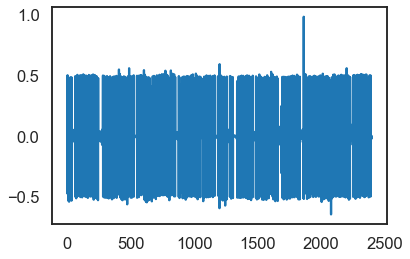

In [30]:
wdt = np.diff(omg)
wdt = np.concatenate((wdt,np.zeros(1)))
plt.plot(wdt)

In [48]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from itertools import product

In [32]:
X = np.array([Phi,omg]).T
y = wdt.copy()

In [52]:
kernel = C(1.0, (1e-2, 1e2)) * RBF([0.5,0.5], (1e-2, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=[0.5, 0.5]),
                         n_restarts_optimizer=1, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [53]:
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
#x = (np.array([x1, x2])).T
#y_pred, MSE = gp.predict(x, return_std=True)
x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)

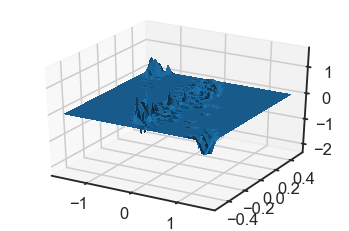

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Xp, Yp = np.meshgrid(x1, x2)
Zp = np.reshape(y_pred,(50,50))

surf = ax.plot_surface(Xp, Yp, Zp, rstride=1, cstride=1, linewidth=0, antialiased=False)

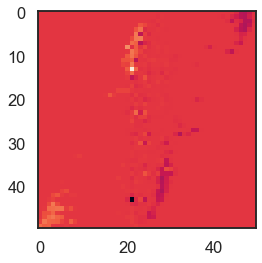

In [59]:
plt.imshow(Zp)